In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-v0")


WARN: Environment '<class 'gym_crumb.envs.crumb_env.CrumbEnv'>' has deprecated methods. Compatibility code invoked.


In [4]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.25,discount=0.99)

In [5]:
def play_and_train(env,agent,t_max=10**4):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getAction(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        
        agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            print agent.epsilon
            break
    return total_reward
    
        
    

0.0524288
mean reward 12.0


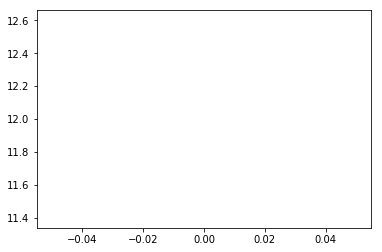

0.04194304
0.033554432
0.0268435456
0.02147483648
0.017179869184
mean reward 8.6


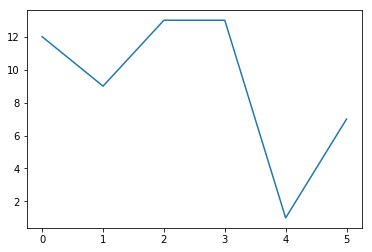

0.0137438953472
0.0109951162778
0.00879609302221
0.00703687441777


KeyboardInterrupt: 

In [7]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i % 5 == 0:
        print "mean reward",np.mean(rewards[-5:])
        plt.plot(rewards)
        plt.show()
        

In [10]:
def play(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    r = 0
    env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getPolicy(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        print r
        
        #agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
    return total_reward